# Experiment 3: Smoothed Support Vector Classifer on Iris Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import tensorflow as tf

from importlib import reload
from mlxtend.plotting import plot_decision_regions
import influence
reload(influence)
from sklearn.svm import SVC

from data import Datafile, load_data
from influence.emp_risk_optimizer import EmpiricalRiskOptimizer
from influence.plot_utils import compare_with_loo
from influence.plot_utils import param_cross_comparison
from influence.closed_forms import I_loss_RidgeCf
from models.regularized_regression import RegularizedRegression
from models.hyperplane_clf import BinaryLogisticRegression
from models.hyperplane_clf import SmoothedSupportVector

/Users/zed/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_train, X_test, y_train, y_test, test_indices = load_data(
    Datafile.Iris, test_config=0.1)
n_tr, p = X_train.shape
n_te, _ = X_test.shape
y_train[y_train==0]=-1
y_test[y_test==0]=-1
print(n_tr, p)

#scl_x = StandardScaler()
#scl_y = StandardScaler()
#X_train = scl_x.fit_transform(X_train)
#X_test = scl_x.transform(X_test)

init_eta = 1e-2
batch_size = 50
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=20000
iter_to_switch_to_sgd=40000
C = 1.0
t = 0.01
# LOO a on random set of training indices, otherwise too slow
leave_indices = None
#assert not set(test_indices) & set(leave_indices)
#print(test_indices)
print(leave_indices)

X_train shape: (90, 4)
y_train shape: (90, 1)
X_test shape: (10, 4)
y_test shape: (10, 1)
90 4
None


In [24]:
skl_clf = SVC(C=1.0,kernel='linear',tol=1e-8)
skl_clf.fit(X_train, y_train.reshape(n_tr,).astype('int'))
skl_clf.predict(X_train) == y_train.reshape(n_tr,)

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [3]:
tf.reset_default_graph()
model_0 = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=1.0,
    t=0.0
)

model_0.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)
I_loss_bf_0 = model_0.influence_loss(
    X_test, y_test,
    method='brute-force',
    damping=0.0001
)
loo_diff_0 = model_0.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.206810
Norm of Params: 7.520674
Norm of Gradient: 0.089703
Fetch training loss gradients (0.058 sec)
LOO Fold 0: loss = 0.20323507 (0.002 sec)
LOO Fold 9: loss = 0.20794995 (0.002 sec)
LOO Fold 18: loss = 0.20794995 (0.002 sec)
LOO Fold 27: loss = 0.20794995 (0.005 sec)
LOO Fold 36: loss = 0.20795000 (0.002 sec)
LOO Fold 45: loss = 0.20794995 (0.002 sec)
LOO Fold 54: loss = 0.20794995 (0.003 sec)
LOO Fold 63: loss = 0.20794995 (0.002 sec)
LOO Fold 72: loss = 0.20794995 (0.003 sec)
LOO Fold 81: loss = 0.20794995 (0.002 sec)


In [4]:
tf.reset_default_graph()
model_01 = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=1.0,
    t=0.1
)

model_01.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)

I_loss_bf_01 = model_01.influence_loss(
    X_test, y_test,
    method='brute-force'
)
loo_diff_01 = model_01.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.215589
Norm of Params: 7.520674
Norm of Gradient: 0.104446
Fetch training loss gradients (0.050 sec)
LOO Fold 0: loss = 0.21241622 (0.002 sec)
LOO Fold 9: loss = 0.21682686 (0.002 sec)
LOO Fold 18: loss = 0.21682647 (0.002 sec)
LOO Fold 27: loss = 0.21682547 (0.002 sec)
LOO Fold 36: loss = 0.21682662 (0.002 sec)
LOO Fold 45: loss = 0.21682686 (0.002 sec)
LOO Fold 54: loss = 0.21682686 (0.002 sec)
LOO Fold 63: loss = 0.21682686 (0.002 sec)
LOO Fold 72: loss = 0.21672073 (0.001 sec)
LOO Fold 81: loss = 0.21682650 (0.002 sec)


In [27]:
tf.reset_default_graph()
model_001 = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=1.0,
    t=0.01
)

model_001.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)

I_loss_bf_001 = model_001.influence_loss(
    X_test, y_test,
    method='brute-force'
)
loo_diff_001 = model_001.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.207204
Norm of Params: 7.520674
Norm of Gradient: 0.046826
Fetch training loss gradients (0.107 sec)
LOO Fold 0: loss = 0.20358384 (0.002 sec)
LOO Fold 9: loss = 0.20834792 (0.002 sec)
LOO Fold 18: loss = 0.20834792 (0.006 sec)
LOO Fold 27: loss = 0.20834792 (0.002 sec)
LOO Fold 36: loss = 0.20834796 (0.002 sec)
LOO Fold 45: loss = 0.20834792 (0.002 sec)
LOO Fold 54: loss = 0.20834792 (0.002 sec)
LOO Fold 63: loss = 0.20834792 (0.002 sec)
LOO Fold 72: loss = 0.20834792 (0.002 sec)
LOO Fold 81: loss = 0.20834792 (0.002 sec)


In [55]:
y_test


array([[-1],
       [-1],
       [-1],
       [1],
       [1],
       [1],
       [1],
       [-1],
       [1],
       [1]], dtype=object)

In [79]:
model_001.get_eval(items=['hessian'])

array([[64.39204  , 28.335888 , 49.42447  , 16.363474 ,  9.714132 ],
       [28.33589  , 12.6188545, 21.742996 ,  7.2226086,  4.2862787],
       [49.42447  , 21.742998 , 38.07554  , 12.62293  ,  7.4562054],
       [16.363476 ,  7.222608 , 12.62293  ,  4.286915 ,  2.4831142],
       [ 9.714133 ,  4.2862787,  7.4562063,  2.483114 ,  1.4698961]],
      dtype=float32)

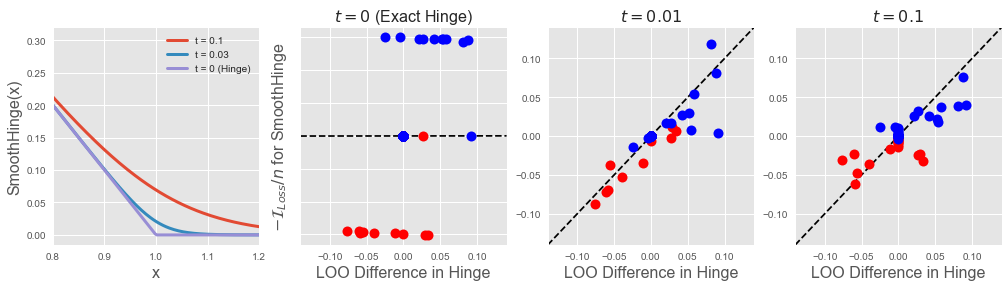

In [75]:
plt.style.use('ggplot')
frame_trunc = 0.14
fig, axes = plt.subplots(
    1, 4, figsize=(17, 4))
# frame_trunc = np.percentile(loo_diff, trunc)
fontsize = 16
s = np.linspace(0.7, 1.3, 200)

t= 0.1
axes[0].plot(s, t*np.log(1+np.exp((1-s)/t)), 
             label='t = 0.1', linewidth=3)
t= 0.03
axes[0].plot(s, t*np.log(1+np.exp((1-s)/t)), 
             label='t = 0.03', linewidth=3)
axes[0].plot(s, [max(1-x,0) for x in s], 
             label='t = 0 (Hinge)', linewidth=3)
axes[1].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)

axes[2].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)

axes[3].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)

for i in range(1):
    axes[1].plot(
        loo_diff_0[(y_train==1).reshape(n_tr,),i:i+1], 
        I_loss_bf_0[(y_train==1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='red', label='Class = 1'
    )
    axes[1].plot(
        loo_diff_0[(y_train==-1).reshape(n_tr,),i:i+1], 
        I_loss_bf_0[(y_train==-1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='blue',  label='Class = -1'
    )

    axes[2].plot(
        loo_diff_001[(y_train==1).reshape(n_tr,),i:i+1], 
        I_loss_bf_001[(y_train==1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='red'
    )
    axes[2].plot(
        loo_diff_001[(y_train==-1).reshape(n_tr,),i:i+1], 
        I_loss_bf_001[(y_train==-1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='blue'
    )


    axes[3].plot(
        loo_diff_01[(y_train==1).reshape(n_tr,),i:i+1], 
        1.6*I_loss_bf_01[(y_train==1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='red'
    )
    axes[3].plot(
        loo_diff_01[(y_train==-1).reshape(n_tr,),i:i+1], 
        1.6*I_loss_bf_01[(y_train==-1).reshape(n_tr,),i:i+1]/n_tr, 'o', markersize=10,
        color='blue'
    )

axes[0].set_xlim((0.8, 1.2))
axes[1].set_xlim((-frame_trunc, frame_trunc))
axes[2].set_xlim((-frame_trunc, frame_trunc))
axes[3].set_xlim((-frame_trunc, frame_trunc))
#axes[1].set_ylim((-frame_trunc, frame_trunc))
axes[2].set_ylim((-frame_trunc, frame_trunc))
axes[3].set_ylim((-frame_trunc, frame_trunc))
axes[1].set_yticklabels([])
#axes[1].set_xticks([-150, -75, 0, 75, 150])
#axes[2].set_xticks([-150, -75, 0, 75, 150])
#axes[0].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
#axes[1].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
axes[1].set_xlabel('LOO Difference in Hinge', fontsize=fontsize)
axes[2].set_xlabel('LOO Difference in Hinge', fontsize=fontsize)
axes[3].set_xlabel('LOO Difference in Hinge', fontsize=fontsize)
axes[1].set_ylabel(r'$-\mathcal{I}_{Loss} / n$ for SmoothHinge', fontsize=fontsize)
#axes[2].set_ylabel(r'$-\mathcal{I}_{Loss} / n$', fontsize=fontsize)
axes[0].set_title('', fontsize=fontsize)
axes[1].set_title(r'$t=0$ (Exact Hinge)', fontsize=fontsize)
axes[2].set_title(r'$t=0.01$', fontsize=fontsize)
axes[3].set_title(r'$t=0.1$', fontsize=fontsize)
#axes[0].set_xticklabels([-0.00016, -0.00008, 0, 0.00008, 0.00016], rotation=15)
#axes[2].imshow(X_test.reshape((28,28)))
axes[0].set_xlabel('x', fontsize=fontsize)
axes[0].set_ylabel('SmoothHinge(x)', fontsize=fontsize)
axes[0].legend()
#axes[1].legend()
plt.savefig('tex/report/fig-svm.eps', dpi=700, bbox_inches='tight')

#### model.fit(
    X_train, y_train,
    n_iter=train_iter,
    verbose=1,
    iter_to_switch_off_minibatch=iter_to_switch_off_minibatch,
    iter_to_switch_to_sgd=iter_to_switch_to_sgd,
    traceback_checkpoint=traceback_checkpoint
)

In [76]:
a, b = loo_diff_001.shape
for j in range(1):
    print("Test Point %d Correlation: %.4f" % (j, np.corrcoef(
        I_loss_bf_001[:, j], loo_diff_001[:, j])[0][1]))
print("Overall Correlation: %.4f" % np.corrcoef(
        I_loss_bf_001[:, :].reshape(a*b,),
        loo_diff_001.reshape(a*b,))[0][1])

Test Point 0 Correlation: 0.8602
Overall Correlation: 0.8624


In [77]:
a, b = loo_diff_01.shape
for j in range(n_te):
    print("Test Point %d Correlation: %.4f" % (j, np.corrcoef(
        I_loss_bf_01[:, j], loo_diff_01[:, j])[0][1]))
print("Overall Correlation: %.4f" % np.corrcoef(
        I_loss_bf_01[:, :].reshape(a*b,),
        loo_diff_01.reshape(a*b,))[0][1])

Test Point 0 Correlation: 0.7700
Test Point 1 Correlation: 0.7294
Test Point 2 Correlation: 0.7421
Test Point 3 Correlation: 0.7421
Test Point 4 Correlation: 0.7615
Test Point 5 Correlation: 0.7475
Test Point 6 Correlation: 0.8900
Test Point 7 Correlation: 0.7421
Test Point 8 Correlation: 0.7420
Test Point 9 Correlation: 0.7365
Overall Correlation: 0.8008


In [62]:
loo_diff_001

array([[-5.55533767e-02,  3.68317962e-03,  3.68317962e-03,
         3.68317962e-03,  3.68317962e-03,  3.68317962e-03,
         9.74265337e-02,  3.68317962e-03,  3.68317962e-03,
         3.68317962e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.67319679e-02, -8.85874033e-04, -8.85874033e-04,
        -8.85874033e-04, -8.85874033e-04, -8.85874033e-04,
        -3.01359892e-02, -8.85874033e-04, -8.85874033e-04,
        -8.85874033e-04],
       [-5.89540005e-02,  2.32671201e-03,  2.32671201e-03,
         2.32671201e-03,  2.32671201e-03,  2.32671201e-03,
         6.72317743e-02,  2.32671201e-03,  2.32671201e-03,
         2.32671201e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [29]:
y_pred = model.predict(X_train)
print("Train accuracy:", np.sum(y_pred == y_train)/n_tr)

y_pred_test = model.predict(X_test)
print("Train accuracy:", np.sum(y_pred_test == y_test)/n_te)

Train accuracy: 0.9888888888888889
Train accuracy: 1.0


In [30]:
I_loss_bf = model.influence_loss(
    X_test, y_test,
    method='brute-force',
)
# I_loss_bf[leave_indices,:]/n_tr

Fetch training loss gradients (0.068 sec)


In [31]:
I_loss_cg = model.influence_loss(
    X_test, y_test,
    method='cg',
    tol=1e-7, 
    max_iter=1000
)

Fetch training loss gradients (0.060 sec)
CG Objective: -0.37401357
CG Objective: -0.93797636
CG Objective: -1.8497186
CG Objective: -2.3643436
CG Objective: -2.3643456
CG Objective: -2.3643532
         Current function value: -2.364353
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 73
         Hessian evaluations: 36
CG Objective: -0.004087117
CG Objective: -0.014685453
CG Objective: -0.014852143
CG Objective: -0.014883654
CG Objective: -0.014883657
Optimization terminated successfully.
         Current function value: -0.014884
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 10
         Hessian evaluations: 16
CG Objective: -0.004087117
CG Objective: -0.014685453
CG Objective: -0.014852143
CG Objective: -0.014883654
CG Objective: -0.014883657
Optimization terminated successfully.
         Current function value: -0.014884
         Iterations: 5
         Function evaluations: 6
         Gradient evaluation

In [32]:
loo_diff = model.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)

LOO Fold 0: loss = 0.20358385 (0.002 sec)
LOO Fold 9: loss = 0.20834792 (0.002 sec)
LOO Fold 18: loss = 0.20834792 (0.003 sec)
LOO Fold 27: loss = 0.20834792 (0.002 sec)
LOO Fold 36: loss = 0.20834796 (0.004 sec)
LOO Fold 45: loss = 0.20834795 (0.004 sec)
LOO Fold 54: loss = 0.20834792 (0.002 sec)
LOO Fold 63: loss = 0.20834792 (0.002 sec)
LOO Fold 72: loss = 0.20834792 (0.002 sec)
LOO Fold 81: loss = 0.20834795 (0.002 sec)


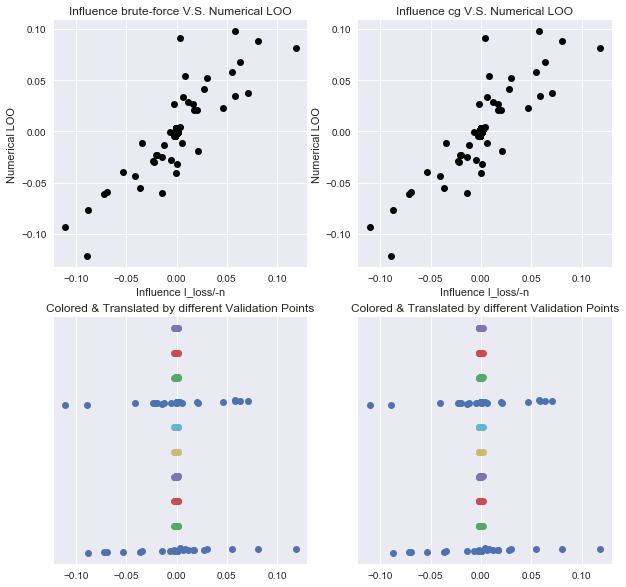

In [33]:
fig, axes = compare_with_loo(
    [I_loss_bf[:,:],
     I_loss_cg[:,:]],
    loo_diff, n_samples=n_tr
)

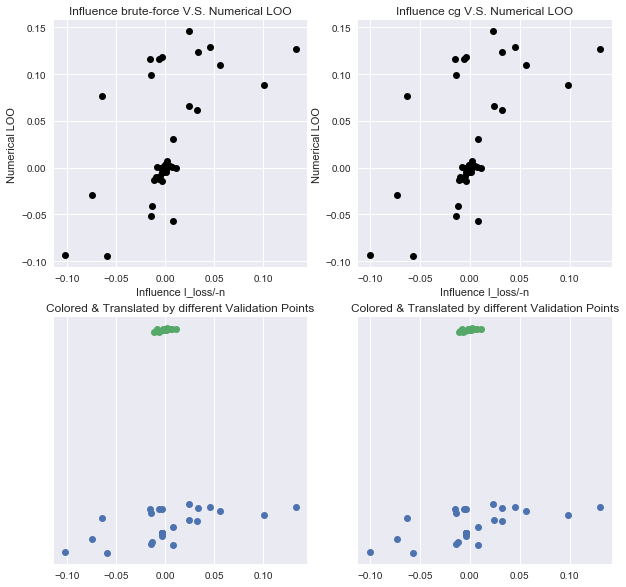

In [14]:
fig, axes = compare_with_loo(
    [I_loss_bf,
     I_loss_cg],
    loo_diff, n_samples=n_tr
)

In [12]:
a, b = loo_diff.shape
for j in range(n_te):
    print("Test Point %d Correlation: %.4f" % (j, np.corrcoef(
        I_loss_cg[:, j], loo_diff[:, j])[0][1]))
print("Overall Correlation: %.4f" % np.corrcoef(
        I_loss_cg[:, :].reshape(a*b,),
        loo_diff.reshape(a*b,))[0][1])

Test Point 0 Correlation: 0.8705
Test Point 1 Correlation: 0.9103
Overall Correlation: 0.8654


In [ ]:
frame_trunc = 0.03
fig, axes = plt.subplots(
    1, 4, figsize=(17, 4), sharex='all', sharey='all')
# frame_trunc = np.percentile(loo_diff, trunc)
fontsize = 16
axes[0].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)
axes[0].plot(
    loo_diff[:, :], 
    I_loss_bf[:, :] / n_tr, 'o', markersize=10
)
axes[1].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)
axes[1].plot(
    loo_diff[:, :],
    I_loss_cg[:, :] / n_tr, 'o', markersize=10
)
axes[2].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)
axes[2].plot(
    loo_diff[:, :], 
    I_loss_lissa_deep[:, :] / n_tr, 'o', markersize=10
)
axes[3].plot(
    [-frame_trunc, frame_trunc],
    [-frame_trunc,frame_trunc], '--', color='black'
)
axes[3].plot(
    loo_diff[:, :], 
    I_loss_lissa_shallow[:, :] / n_tr, 'o', markersize=10
)

axes[0].update({
    'title': 'Influence 1 V.S. Numerical LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Numerical LOO',
    'xlim': (-frame_trunc, frame_trunc),
    'ylim': (-frame_trunc, frame_trunc),
    'xticks':[-0.008, -0.004, 0, 0.004, 0.008],
    'yticks':[-0.008, -0.004, 0, 0.004, 0.008],
})
axes[1].set_xlim((-frame_trunc, frame_trunc))
axes[2].set_xlim((-frame_trunc, frame_trunc))
#axes[1].set_xticks([-150, -75, 0, 75, 150])
#axes[2].set_xticks([-150, -75, 0, 75, 150])
axes[0].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
axes[1].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
axes[2].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
axes[3].set_xlabel('LOO Difference in Loss', fontsize=fontsize)
axes[0].set_ylabel(r'$-\mathcal{I}_{Loss} / n$', fontsize=fontsize)
axes[0].set_title('Explicit Hessian Inverse', fontsize=fontsize)
axes[1].set_title('Conjugate Gradient', fontsize=fontsize)
axes[2].set_title(r'LiSSA (full $\widehat{H}$)', fontsize=fontsize)
axes[3].set_title('LiSSA', fontsize=fontsize)


plt.savefig('tex/report/fig-svc.eps', dpi=600, bbox_inches='tight')

# Smooth Hinge with different t

# t = 0

In [34]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=C,
    t=0
)
model.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.206811
Norm of Params: 7.520672
Norm of Gradient: 0.089703


SmoothHinge-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=1.0,t=0)

In [36]:
I_loss_bf1 = model.influence_loss(
    X_test, y_test,
    method='brute-force',
    damping=0.001
)

loo_diff1 = model.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)

Fetch training loss gradients (0.048 sec)
LOO Fold 0: loss = 0.20323507 (0.002 sec)
LOO Fold 9: loss = 0.20795000 (0.002 sec)
LOO Fold 18: loss = 0.20794997 (0.003 sec)
LOO Fold 27: loss = 0.20794997 (0.002 sec)
LOO Fold 36: loss = 0.20795000 (0.001 sec)
LOO Fold 45: loss = 0.20794997 (0.001 sec)
LOO Fold 54: loss = 0.20794997 (0.002 sec)
LOO Fold 63: loss = 0.20794997 (0.002 sec)
LOO Fold 72: loss = 0.20794997 (0.002 sec)
LOO Fold 81: loss = 0.20795000 (0.001 sec)


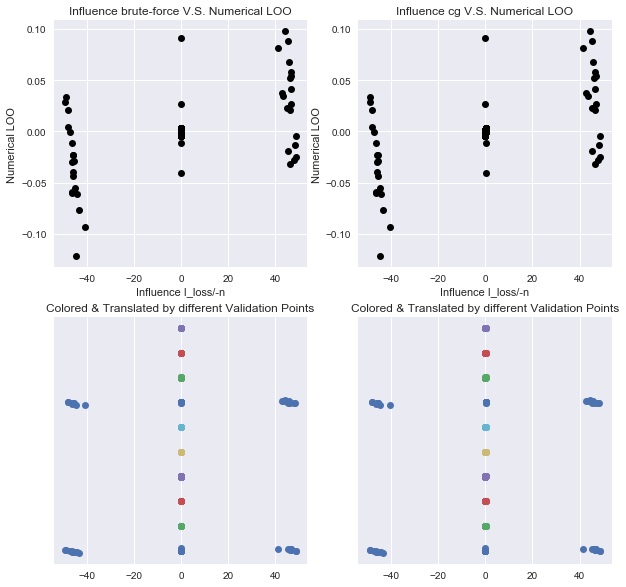

In [37]:
fig, axes = compare_with_loo(
    [I_loss_bf1, I_loss_bf1],
    loo_diff1, n_samples=n_tr
)

# t = 0.1

In [38]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=C,
    t=0.1
)
model.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.215589
Norm of Params: 7.520672
Norm of Gradient: 0.104449


SmoothHinge-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=1.0,t=0.1)

In [39]:
I_loss_bf2 = model.influence_loss(
    X_test, y_test,
    method='brute-force',
)

loo_diff2 = model.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)

Fetch training loss gradients (0.060 sec)
LOO Fold 0: loss = 0.21241622 (0.002 sec)
LOO Fold 9: loss = 0.21682687 (0.002 sec)
LOO Fold 18: loss = 0.21682650 (0.002 sec)
LOO Fold 27: loss = 0.21682549 (0.002 sec)
LOO Fold 36: loss = 0.21682660 (0.003 sec)
LOO Fold 45: loss = 0.21682686 (0.003 sec)
LOO Fold 54: loss = 0.21682687 (0.003 sec)
LOO Fold 63: loss = 0.21682687 (0.002 sec)
LOO Fold 72: loss = 0.21672076 (0.001 sec)
LOO Fold 81: loss = 0.21682651 (0.002 sec)


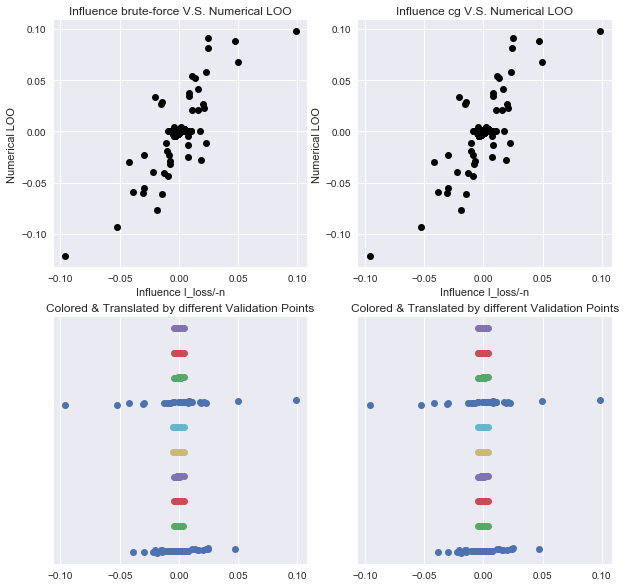

In [40]:
fig, axes = compare_with_loo(
    [I_loss_bf2, I_loss_bf2],
    loo_diff2, n_samples=n_tr
)

# t = 0.01

In [41]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=C,
    t=0.01
)
model.fit_with_sklearn(
    {'X':X_train, 'y': y_train}
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.207204
Norm of Params: 7.520672
Norm of Gradient: 0.046834


SmoothHinge-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=1.0,t=0.01)

In [42]:
I_loss_bf3 = model.influence_loss(
    X_test, y_test,
    method='brute-force',
)

Fetch training loss gradients (0.055 sec)


In [44]:
loo_diff3 = model.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True
)

LOO Fold 0: loss = 0.20358385 (0.003 sec)
LOO Fold 9: loss = 0.20834792 (0.002 sec)
LOO Fold 18: loss = 0.20834792 (0.001 sec)
LOO Fold 27: loss = 0.20834792 (0.002 sec)
LOO Fold 36: loss = 0.20834796 (0.002 sec)
LOO Fold 45: loss = 0.20834795 (0.002 sec)
LOO Fold 54: loss = 0.20834792 (0.002 sec)
LOO Fold 63: loss = 0.20834792 (0.001 sec)
LOO Fold 72: loss = 0.20834792 (0.002 sec)
LOO Fold 81: loss = 0.20834795 (0.002 sec)


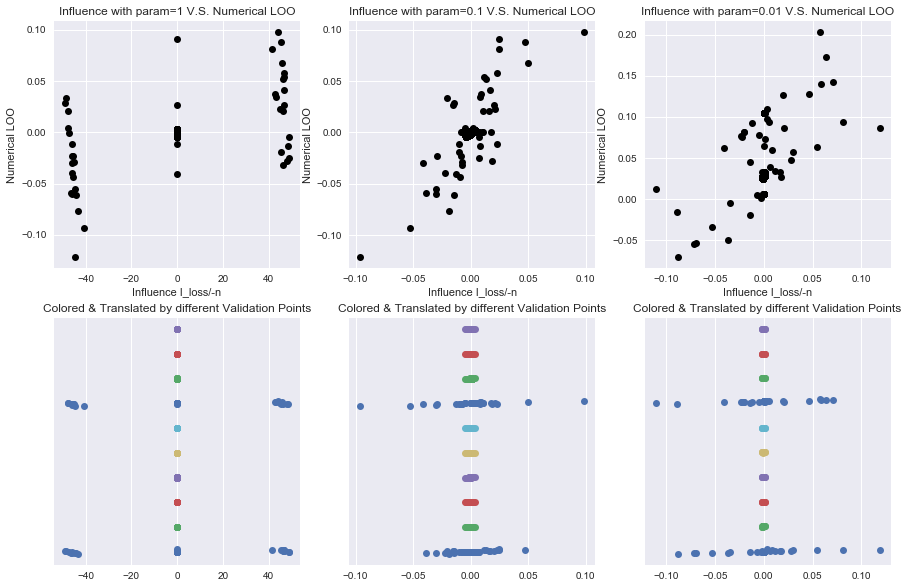

In [45]:
fig, axes = param_cross_comparison(
    [I_loss_bf1, I_loss_bf2, I_loss_bf3],
    [loo_diff1, loo_diff2, loo_diff3], n_tr, [1, 0.1, 0.01]
)

# mnist

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from importlib import reload
from mlxtend.plotting import plot_decision_regions
import influence
reload(influence)
from sklearn.svm import SVC

from data import Datafile, load_data
from influence.emp_risk_optimizer import EmpiricalRiskOptimizer
from influence.plot_utils import compare_with_loo
from influence.plot_utils import param_cross_comparison
from influence.closed_forms import I_loss_RidgeCf
from models.regularized_regression import RegularizedRegression
from models.hyperplane_clf import BinaryLogisticRegression
from models.hyperplane_clf import SmoothedSupportVector

In [35]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test, test_indices = load_data(
    Datafile.BinaryMNIST17, test_config=[7])
n_tr, p = X_train.shape
n_te, _ = X_test.shape
print(n_tr, p)

'''
scl_x = StandardScaler()
scl_y = StandardScaler()
X_train = scl_x.fit_transform(X_train)
X_test = scl_x.transform(X_test)
'''

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

init_eta = 1e-1
batch_size = 30
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=35000
iter_to_switch_to_sgd=np.inf
# LOO a on random set of training indices, otherwise too slow
np.random.seed(1)
leave_indices = [2774,  491, 2675, 5956, 1686, 8943, 3614, 1386, 1521, 2396,  908,
       3095, 3238, 3128, 2113, 7470, 5271, 7282, 5130, 5939, 7170, 4602,
       6367, 1279, 1716, 3268, 3260, 5730,  334, 1683, 6047, 6046, 6045,
       6049, 6048, 6040, 6043, 6042, 6041, 6050, 6039, 6038, 6037, 6036,
       6035, 6034, 6033, 6032, 6031, 6030, 6044, 6051, 6059, 6053, 6083,
       6082, 6081, 6080, 6079, 6078, 6077, 6076, 6075, 6074, 6073, 6072,
       6071, 6052, 6070, 6068, 6067, 6066, 6065, 6064, 6063, 6062, 6061,
       6060, 6058, 6057, 6056, 6055, 6069, 6029, 6023, 6027, 5989, 5988,
       5987, 5986, 5985, 5984, 5983, 5982, 5981, 5980, 5979, 5978, 5977,
       5976]

if hasattr(test_indices, '__iter__') and hasattr(leave_indices, '__iter__'):
    assert not set(test_indices) & set(leave_indices)
    print(test_indices)
    print(leave_indices)

X_train shape: (9084, 784)
y_train shape: (9084, 1)
X_test shape: (1, 784)
y_test shape: (1, 1)
9084 784
[7]
[2774, 491, 2675, 5956, 1686, 8943, 3614, 1386, 1521, 2396, 908, 3095, 3238, 3128, 2113, 7470, 5271, 7282, 5130, 5939, 7170, 4602, 6367, 1279, 1716, 3268, 3260, 5730, 334, 1683, 6047, 6046, 6045, 6049, 6048, 6040, 6043, 6042, 6041, 6050, 6039, 6038, 6037, 6036, 6035, 6034, 6033, 6032, 6031, 6030, 6044, 6051, 6059, 6053, 6083, 6082, 6081, 6080, 6079, 6078, 6077, 6076, 6075, 6074, 6073, 6072, 6071, 6052, 6070, 6068, 6067, 6066, 6065, 6064, 6063, 6062, 6061, 6060, 6058, 6057, 6056, 6055, 6069, 6029, 6023, 6027, 5989, 5988, 5987, 5986, 5985, 5984, 5983, 5982, 5981, 5980, 5979, 5978, 5977, 5976]


In [36]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook-mnist',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=1e4,
    t=0.01
)
model.fit_with_sklearn(
    {'X':X_train, 'y': y_train},
    tol=1e-5,
    max_iter=-1
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.001095
Norm of Params: 1.330832
Norm of Gradient: 1.319121


SmoothHinge-Notebook-mnist(init_eta=0.1,batch_size=30,decay_epochs=(10000, 20000),C=10000.0,t=0.01)

In [37]:
y_pred = model.predict(X_train)
print("Train accuracy:", np.sum(y_pred == y_train)/n_tr)

y_pred_test = model.predict(X_test)
print("Test accuracy:", np.sum(y_pred_test == y_test)/n_te)

Train accuracy: 1.0
Test accuracy: 1.0


In [38]:
I_loss_bf = model.influence_loss(
    X_test, y_test,
    method='brute-force',
)

Fetch training loss gradients (5.639 sec)


In [ ]:
I_loss_bf

In [39]:
loo_diff = model.leave_one_out_refit(
    X_test, y_test,
    n_iter=loo_extra_iter,
    iter_to_load=checkpoint_iter,
    leave_indices=leave_indices,
    sklearn_refit=True,
    verbose=0.01
)

LOO Fold 0: loss = 0.00109397 (1.776 sec)
LOO Fold 1: loss = 0.00109474 (1.749 sec)
LOO Fold 2: loss = 0.00109394 (1.741 sec)
LOO Fold 3: loss = 0.00109401 (1.713 sec)
LOO Fold 4: loss = 0.00109473 (1.739 sec)
LOO Fold 5: loss = 0.00109471 (1.996 sec)
LOO Fold 6: loss = 0.00109473 (1.910 sec)
LOO Fold 7: loss = 0.00109474 (1.838 sec)
LOO Fold 8: loss = 0.00109399 (1.743 sec)
LOO Fold 9: loss = 0.00109474 (1.781 sec)
LOO Fold 10: loss = 0.00109474 (1.854 sec)
LOO Fold 11: loss = 0.00109474 (1.886 sec)
LOO Fold 12: loss = 0.00109474 (1.769 sec)
LOO Fold 13: loss = 0.00109474 (1.741 sec)
LOO Fold 14: loss = 0.00109474 (1.732 sec)
LOO Fold 15: loss = 0.00109474 (1.741 sec)
LOO Fold 16: loss = 0.00109474 (1.742 sec)
LOO Fold 17: loss = 0.00109473 (1.809 sec)
LOO Fold 18: loss = 0.00109474 (1.791 sec)
LOO Fold 19: loss = 0.00109474 (1.735 sec)
LOO Fold 20: loss = 0.00109474 (1.753 sec)
LOO Fold 21: loss = 0.00109474 (1.741 sec)
LOO Fold 22: loss = 0.00109474 (1.815 sec)
LOO Fold 23: loss = 0

In [34]:
np.argsort(np.abs(I_loss_bf).T)[0][:100]

array([2774,  491, 2675, 5956, 1686, 8943, 3614, 1386, 1521, 2396,  908,
       3095, 3238, 3128, 2113, 7470, 5271, 7282, 5130, 5939, 7170, 4602,
       6367, 1279, 1716, 3268, 3260, 5730,  334, 1683, 6047, 6046, 6045,
       6049, 6048, 6040, 6043, 6042, 6041, 6050, 6039, 6038, 6037, 6036,
       6035, 6034, 6033, 6032, 6031, 6030, 6044, 6051, 6059, 6053, 6083,
       6082, 6081, 6080, 6079, 6078, 6077, 6076, 6075, 6074, 6073, 6072,
       6071, 6052, 6070, 6068, 6067, 6066, 6065, 6064, 6063, 6062, 6061,
       6060, 6058, 6057, 6056, 6055, 6069, 6029, 6023, 6027, 5989, 5988,
       5987, 5986, 5985, 5984, 5983, 5982, 5981, 5980, 5979, 5978, 5977,
       5976])

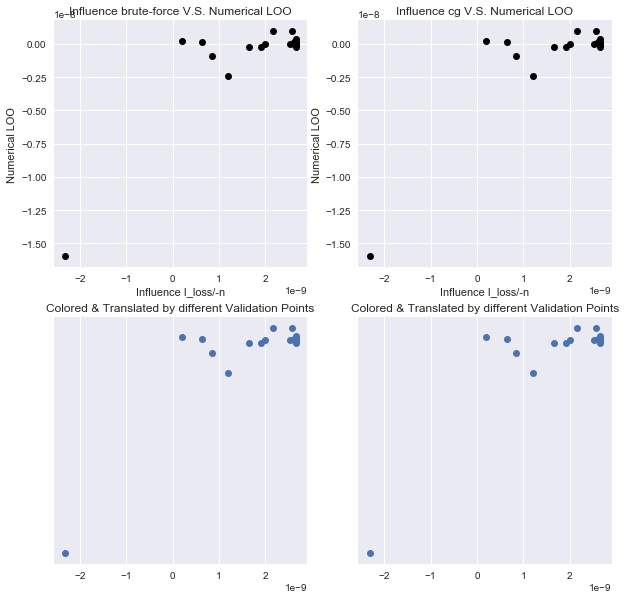

In [40]:
fig, axes = compare_with_loo(
    [I_loss_bf[leave_indices,:], I_loss_bf[leave_indices,:]],
    loo_diff, n_samples=n_tr
)

# Influence function application

## Vanilla

In [2]:
df = pd.read_csv('data/hyperplane_2.csv')
n = len(df)
X_vanilla = df.values[:, 0:2]
y_vanilla = df.values[:, -1].reshape(n, 1)
n, p = X_vanilla.shape

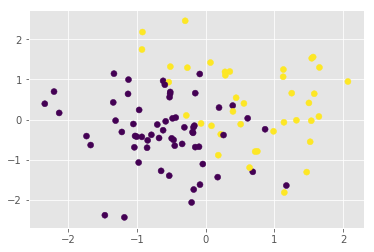

In [56]:
plt.scatter(X_vanilla[:,0], X_vanilla[:,1], c=y_vanilla[:,0])

In [61]:
tf.reset_default_graph()

init_eta = 1e-2
batch_size = 40
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=20000
iter_to_switch_to_sgd=40000
C = 1.0
t = 0
leave_indices = None
print(leave_indices)

model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=C,
    t=t
)
model.fit(
    X_vanilla, y_vanilla,
    n_iter=train_iter,
    verbose=1,
    iter_to_switch_off_minibatch=iter_to_switch_off_minibatch,
    iter_to_switch_to_sgd=iter_to_switch_to_sgd,
    traceback_checkpoint=traceback_checkpoint
)

None
Step 0, Epoch 0: loss = 1.00000000 (0.129 sec)
Step 1000, Epoch 400: loss = 0.90320569 (0.001 sec)
Step 2000, Epoch 800: loss = 0.77111202 (0.001 sec)
Step 3000, Epoch 1200: loss = 0.80412847 (0.001 sec)
Step 4000, Epoch 1600: loss = 0.74742919 (0.001 sec)
Step 5000, Epoch 2000: loss = 0.75009531 (0.001 sec)
Step 6000, Epoch 2400: loss = 0.66249055 (0.001 sec)
Step 7000, Epoch 2800: loss = 0.69412100 (0.001 sec)
Step 8000, Epoch 3200: loss = 0.77452767 (0.001 sec)
Step 9000, Epoch 3600: loss = 0.74211615 (0.001 sec)
Step 10000, Epoch 4000: loss = 0.75479352 (0.001 sec)
Step 11000, Epoch 4400: loss = 0.79446650 (0.002 sec)
Step 12000, Epoch 4800: loss = 0.70830232 (0.002 sec)
Step 13000, Epoch 5200: loss = 0.78873652 (0.002 sec)
Step 14000, Epoch 5600: loss = 0.79677331 (0.002 sec)
Step 15000, Epoch 6000: loss = 0.64701521 (0.001 sec)
Step 16000, Epoch 6400: loss = 0.87257689 (0.001 sec)
Step 17000, Epoch 6800: loss = 0.83896351 (0.001 sec)
Step 18000, Epoch 7200: loss = 0.77661848

SmoothHinge-Notebook(init_eta=0.01,batch_size=40,decay_epochs=(10000, 20000),C=1.0,t=0)

In [62]:
I_loss_bf4 = model.influence_loss(
    X_vanilla, y_vanilla,
    method='brute-force',
)

Fetch training loss gradients (0.288 sec)


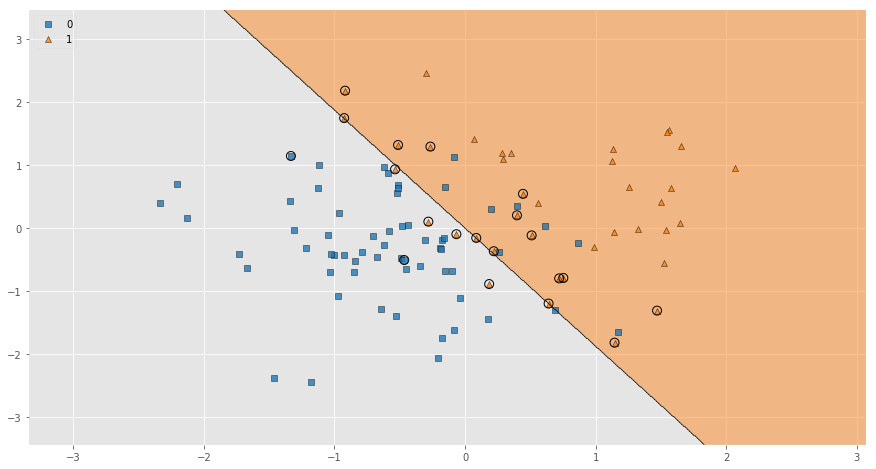

In [64]:
fig,_ = plt.subplots(figsize=(15,8))
abs_mean_i_loss = np.abs(sum(I_loss_bf4)/sum(sum(I_loss_bf4)))
plot_decision_regions(X_vanilla, y_vanilla.astype(int).reshape(100,), X_highlight=X_vanilla[np.argsort(-abs_mean_i_loss)[0:20]], clf=model, legend=2)

## Iris

In [139]:
tf.reset_default_graph()

# [6, 47]
X_train, X_test, y_train, y_test, test_indices = load_data(
    Datafile.Iris, test_config=0.2)
n_tr, p = X_train.shape
n_te, _ = X_test.shape
print(n_tr, p)

X_train shape: (80, 4)
y_train shape: (80, 1)
X_test shape: (20, 4)
y_test shape: (20, 1)
80 4


In [140]:
init_eta = 1e-2
batch_size = 50
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=20000
iter_to_switch_to_sgd=40000
C = 1.0
t = 0.01
# LOO a on random set of training indices, otherwise too slow
leave_indices = None
#assert not set(test_indices) & set(leave_indices)
#print(test_indices)
print(leave_indices)

model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=C,
    t=0.1
)
model.fit(
    X_train, y_train,
    n_iter=train_iter,
    verbose=1,
    iter_to_switch_off_minibatch=iter_to_switch_off_minibatch,
    iter_to_switch_to_sgd=iter_to_switch_to_sgd,
    traceback_checkpoint=traceback_checkpoint
)

None
Step 0, Epoch 0: loss = 1.00000465 (0.104 sec)
Step 1000, Epoch 624: loss = 0.46070844 (0.001 sec)
Step 2000, Epoch 1249: loss = 0.50069886 (0.002 sec)
Step 3000, Epoch 1874: loss = 0.58066374 (0.001 sec)
Step 4000, Epoch 2499: loss = 0.56068963 (0.001 sec)
Step 5000, Epoch 3124: loss = 0.54069090 (0.001 sec)
Step 6000, Epoch 3749: loss = 0.44072878 (0.001 sec)
Step 7000, Epoch 4374: loss = 0.50070959 (0.001 sec)
Step 8000, Epoch 4999: loss = 0.56066710 (0.001 sec)
Step 9000, Epoch 5624: loss = 0.52071398 (0.002 sec)
Step 10000, Epoch 6249: loss = 0.54065973 (0.002 sec)
Step 11000, Epoch 6874: loss = 0.54069173 (0.001 sec)
Step 12000, Epoch 7499: loss = 0.50067079 (0.001 sec)
Step 13000, Epoch 8124: loss = 0.60066491 (0.001 sec)
Step 14000, Epoch 8749: loss = 0.54069841 (0.002 sec)
Step 15000, Epoch 9374: loss = 0.56069410 (0.001 sec)
Step 16000, Epoch 9999: loss = 0.52069455 (0.001 sec)
Step 17000, Epoch 10624: loss = 0.52067548 (0.001 sec)
Step 18000, Epoch 11249: loss = 0.62065

SmoothHinge-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=1.0,t=0.1)

In [5]:
I_loss_bf5 = model.influence_loss(
    X_train, y_train,
    method='brute-force',
)
mean_i_loss = sum(I_loss_bf5)/sum(sum(I_loss_bf5))

Fetch training loss gradients (0.109 sec)


Text(0,0.5,'Mean Influence loss')

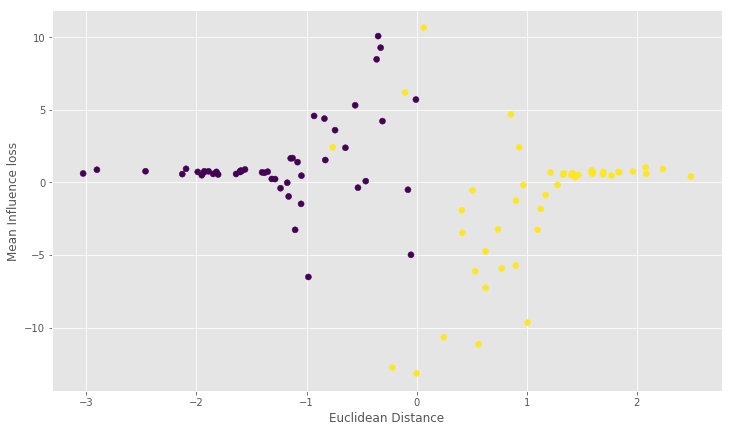

In [48]:
fig,axis = plt.subplots(figsize = (12,7))
beta = model.get_eval(items=['params'])['beta']
euclidean_dist = X_train.dot(beta)
plt.scatter(euclidean_dist.flatten(), mean_i_loss, c=y_train[:,0])
plt.xlabel('Euclidean Distance')
plt.ylabel('Mean Influence loss')

# Logistic Regression vs SVM

In [140]:
X_train, X_test, y_train, y_test, test_indices = load_data(
    Datafile.Iris, test_config=10)
n_tr, p = X_train.shape
n_te, _ = X_test.shape
y_train[y_train==0]=-1 
y_test[y_test==0]=-1

'''
scl_x = StandardScaler()
scl_y = StandardScaler()
X_train = scl_x.fit_transform(X_train)
X_test = scl_x.transform(X_test)
'''

print(n_tr, p)

X_train shape: (90, 4)
y_train shape: (90, 1)
X_test shape: (10, 4)
y_test shape: (10, 1)
90 4


In [194]:
tf.reset_default_graph()

y_train[y_train==0]=-1
y_test[y_test==0]=-1

init_eta = 1e-2
batch_size = 50
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=20000
iter_to_switch_to_sgd=40000
C = 1.0
t = 0.01
# LOO a on random set of training indices, otherwise too slow
leave_indices = None
#assert not set(test_indices) & set(leave_indices)
#print(test_indices)
print(leave_indices)

svm_model = SmoothedSupportVector(
    model_name='SmoothHinge-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=1.0,
    t=0.1
)

None


In [195]:
svm_model.fit_with_sklearn({'X':X_train, 'y':y_train})


Model Evaluations:
------------------------------------------
Empirical Risk: 0.215589
Norm of Params: 7.520674
Norm of Gradient: 0.104446


SmoothHinge-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=1.0,t=0.1)

In [196]:
y_pred = svm_model.predict(X_train)
print("Train accuracy:", np.sum(y_pred == y_train)/n_tr)

y_pred_test = svm_model.predict(X_test)
print("Test accuracy:", np.sum(y_pred_test == y_test)/len(y_test))

Train accuracy: 0.9888888888888889
Test accuracy: 1.0


In [197]:
I_loss_bf_svm = svm_model.influence_loss(
    X_test, y_test,
    method='brute-force',
)
# mean_i_loss_svm = sum(I_loss_bf_svm)

Fetch training loss gradients (0.055 sec)


In [198]:
tf.reset_default_graph()

y_train[y_train==-1]=0
y_test[y_test==-1]=0

blr_model = BinaryLogisticRegression(
    model_name='BinaryLogistic-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=5.0
)

blr_model.fit_with_sklearn(
    {'X':X_train, 'y':y_train}
)


Model Evaluations:
------------------------------------------
Empirical Risk: 0.603459
Norm of Params: 1.929761
Norm of Gradient: 0.107209


BinaryLogistic-Notebook(init_eta=0.01,batch_size=50,decay_epochs=(10000, 20000),C=5.0)

In [199]:
I_loss_bf_blr = blr_model.influence_loss(
    X_test, y_test,
    method='brute-force',
)

Fetch training loss gradients (0.042 sec)


In [200]:
y_pred = blr_model.predict(X_train)
print("Train accuracy:", np.sum(y_pred == y_train)/len(y_train))

y_pred_test = blr_model.predict(X_test)
print("Test accuracy:", np.sum(y_pred_test == y_test)/len(y_test))

Train accuracy: 0.9555555555555556
Test accuracy: 0.9


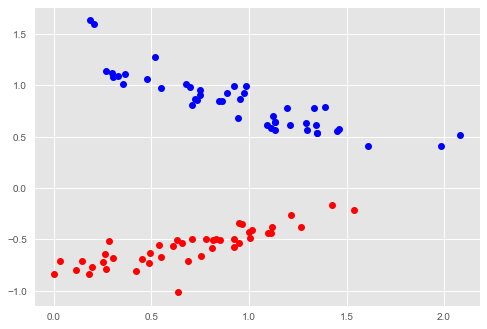

In [201]:
beta_blr = blr_model.get_eval(items=['params'])['beta']
plt.plot(np.abs(X_train.dot(beta_blr))[y_train==1], 
            I_loss_bf_blr[:,0:1][y_train==1], 'o', color='red')
plt.plot(np.abs(X_train.dot(beta_blr))[y_train==0], 
            I_loss_bf_blr[:,0:1][y_train==0], 'o', color='blue')
#plt.xlim(-0.3, 2)

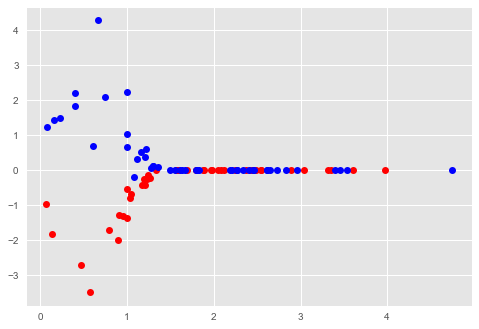

In [202]:
beta_svm = svm_model.get_eval(items=['params'])['beta']
beta_0 = svm_model.get_eval(items=['params'])['intercept']
plt.plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==1], 
            I_loss_bf_svm[:,0:1][y_train==1], 'o', color='red')
plt.plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==0], 
            I_loss_bf_svm[:,0:1][y_train==0], 'o', color='blue')
#plt.xlim(-0.3, 2)

In [ ]:
beta_blr = blr_model.get_eval(items=['params'])['beta']
plt.plot(np.abs(X_train.dot(beta_blr))[y_train==1], 
            I_loss_bf_blr[:,:][y_train==1], 'o', color='red')
plt.plot(np.abs(X_train.dot(beta_blr))[y_train==0], 
            I_loss_bf_blr[:,:][y_train==0], 'o', color='blue')

In [182]:


init_eta = 0.01
batch_size = 30
train_iter = 50000
traceback_checkpoint = 45000
loo_extra_iter = 5000
decay_epochs = (10000, 20000)
checkpoint_iter = traceback_checkpoint-1
iter_to_switch_off_minibatch=35000
iter_to_switch_to_sgd=np.inf
# LOO a on random set of training indices, otherwise too slow
leave_indices = None

if hasattr(test_indices, '__iter__') and hasattr(leave_indices, '__iter__'):
    assert not set(test_indices) & set(leave_indices)
    print(test_indices)
    print(leave_indices)

blr_model = BinaryLogisticRegression(
    model_name='BinaryLogistic-Notebook',
    init_eta=init_eta,
    decay_epochs=decay_epochs,
    batch_size=batch_size,
    C=5.0
)


"""
blr_model.fit(
    X_train, y_train,
    n_iter=train_iter,
    verbose=1,
    iter_to_switch_off_minibatch=iter_to_switch_off_minibatch,
    iter_to_switch_to_sgd=iter_to_switch_to_sgd,
    traceback_checkpoint=traceback_checkpoint
)
"""



'\nblr_model.fit(\n    X_train, y_train,\n    n_iter=train_iter,\n    verbose=1,\n    iter_to_switch_off_minibatch=iter_to_switch_off_minibatch,\n    iter_to_switch_to_sgd=iter_to_switch_to_sgd,\n    traceback_checkpoint=traceback_checkpoint\n)\n'

In [183]:
y_pred = blr_model.predict(X_train)
print("Train accuracy:", np.sum(y_pred == y_train)/len(y_train))

y_pred_test = blr_model.predict(X_test)
print("Test accuracy:", np.sum(y_pred_test == y_test)/len(y_test))

AssertionError: 

In [176]:
I_loss_bf_blr = blr_model.influence_loss(
    X_test, y_test,
    method='brute-force',
)
mean_i_loss_blr = sum(I_loss_bf_blr)

Fetch training loss gradients (0.041 sec)


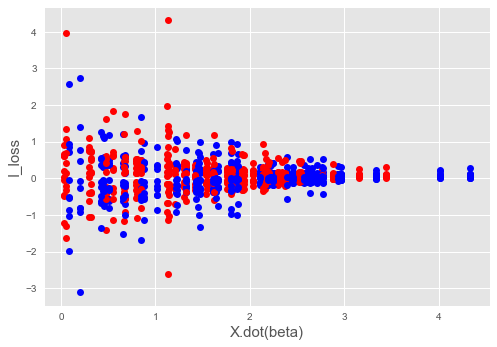

In [174]:
for i in range(10):
    plt.plot(np.abs(X_train.dot(beta_blr))[y_train==1], 
            I_loss_bf_blr[:,i:i+1][y_train==1], 'o', color='red')
    plt.plot(np.abs(X_train.dot(beta_blr))[y_train==0], 
            I_loss_bf_blr[:,i:i+1][y_train==0], 'o', color='blue')
plt.xlabel('X.dot(beta)', fontsize=15)
plt.ylabel('I_loss', fontsize=15)

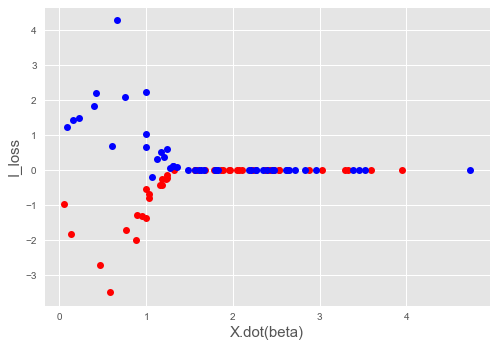

In [125]:
for i in range(1):
    plt.plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==1], 
            I_loss_bf_svm[:,i:i+1][y_train==1], 'o', color='red')
    plt.plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==0], 
            I_loss_bf_svm[:,i:i+1][y_train==0], 'o', color='blue')
plt.xlabel('X.dot(beta)', fontsize=15)
plt.ylabel('I_loss', fontsize=15)

In [225]:
norm_iloss_svm[euclidean_dist_svm>1.5]


array([ 0.0065239 ,  0.00652521,  0.00652115,  0.00652473,  0.00652474,
        0.00651709,  0.00649424,  0.00615403,  0.00652474,  0.00582787,
        0.00640858,  0.0065248 ,  0.00652485,  0.00664685,  0.00643534,
        0.00652474,  0.00652339,  0.00722972,  0.00634918,  0.0093643 ,
        0.00649068, -0.00046729,  0.00652416,  0.0065059 , -0.00032454,
        0.00653276,  0.00652512,  0.00652496,  0.00652474,  0.00652474,
        0.00652476,  0.00624854,  0.00652474,  0.00655838,  0.00652474,
        0.00660274,  0.00652722,  0.01501799,  0.00652444,  0.00652475,
        0.00652475,  0.01469188,  0.00652474,  0.00313225,  0.00653286,
        0.00652398,  0.0071227 ,  0.00652527,  0.00652563,  0.00652475])

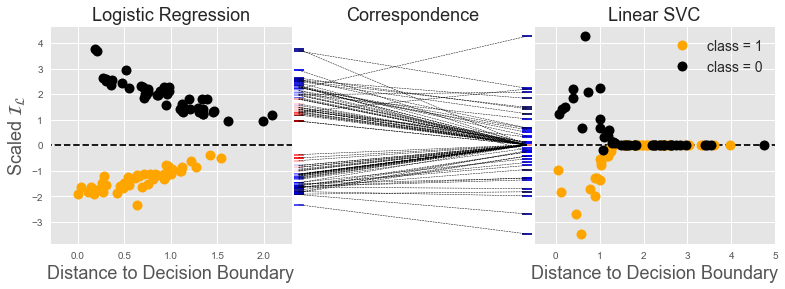

In [280]:
fig, axes = plt.subplots(1,3, figsize=(13,4), sharey=True)

beta_blr = blr_model.get_eval(items=['params'])['beta']
axes[0].plot([-1, 3],[0,0], '--', color='black')
axes[2].plot([-1, 5],[0,0], '--', color='black')
axes[0].plot(np.abs(X_train.dot(beta_blr))[y_train==1], 
            2.3*I_loss_bf_blr[:,0:1][y_train==1], 
             'o', markersize=10,color='orange')
axes[0].plot(np.abs(X_train.dot(beta_blr))[y_train==0], 
            2.3*I_loss_bf_blr[:,0:1][y_train==0], 
             'o', markersize=10,color='black')

beta_svm = svm_model.get_eval(items=['params'])['beta']
beta_0 = svm_model.get_eval(items=['params'])['intercept']
axes[2].plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==1], 
            I_loss_bf_svm[:,0:1][y_train==1], 'o', markersize=10,
             color='orange',label='class = 1')
axes[2].plot(np.abs(X_train.dot(beta_svm)+beta_0)[y_train==0],
            I_loss_bf_svm[:,0:1][y_train==0], 'o', 
             color='black',markersize=10,label='class = 0')


plt.subplots_adjust(wspace=0, hspace=0)
fontsize = 18
axes[1].set_facecolor((1,1,1))
axes[0].set_xlim((-0.3, 2.3))
axes[2].set_xlim((-0.5, 5))
axes[1].set_xlim((-0.03, 1.03))
axes[1].set_xticks([])
for i in range(1):
    norm_iloss_blr = I_loss_bf_blr[:,i:i+1]*2.3
    norm_iloss_svm = I_loss_bf_svm[:,i:i+1]
    axes[1].scatter(np.zeros(n_tr),
                norm_iloss_blr,marker='_', c = euclidean_dist_blr[:,0],
                cmap=plt.get_cmap('seismic'), s=100)
    #norm_iloss_svm
    norm_iloss_svm_long = norm_iloss_svm[norm_iloss_svm>1.5]
    axes[1].scatter(np.ones(n_tr),
                norm_iloss_svm, marker='_',c = euclidean_dist_svm[:,0],
                cmap=plt.get_cmap('seismic'), s=100)


    for i in range(len(norm_iloss_blr)):
        axes[1].plot([0,1], [norm_iloss_blr[i], norm_iloss_svm[i]], '--', 
                color='black', linewidth=0.5)
axes[0].set_xlabel('Distance to Decision Boundary', fontsize=fontsize)
axes[2].set_xlabel('Distance to Decision Boundary', fontsize=fontsize)
axes[1].set_title('Correspondence', fontsize=fontsize)
axes[0].set_title('Logistic Regression', fontsize=fontsize)
axes[0].set_ylabel(r'Scaled $\mathcal{I}_{\mathcal{L}}$', fontsize=fontsize)
axes[2].set_title('Linear SVC', fontsize=fontsize)
plt.savefig('tex/report/fig-app1.eps', dpi=600, bbox_inches='tight')
axes[2].legend(fontsize=14)

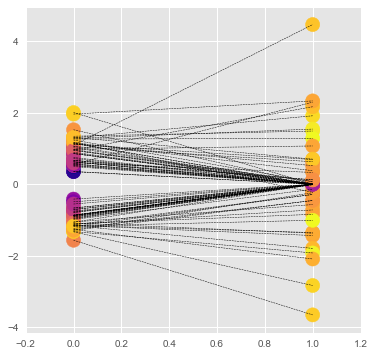

In [203]:
#fig, ax = plt.subplots(figsize=(12,8))

beta_blr = blr_model.get_eval(items=['params'])['beta']
euclidean_dist_blr = np.abs(X_train.dot(beta_blr))

beta_svm = svm_model.get_eval(items=['params'])['beta']
euclidean_dist_svm = np.abs(X_train.dot(beta_svm)+beta_0)

"""
for i in range(80):
    norm_iloss_blr = StandardScaler().fit_transform(I_loss_bf_blr[:,i:i+1])
    norm_iloss_svm = StandardScaler().fit_transform(I_loss_bf_svm[:,i:i+1])
    plt.scatter(np.zeros(len(mean_i_loss_blr)),
            norm_iloss_blr, c = -euclidean_dist_blr[:,0],
            cmap=plt.get_cmap('viridis'), s=200)
    plt.scatter(np.ones(len(mean_i_loss_svm)),
                norm_iloss_svm, c = -euclidean_dist_svm[:,0],
                cmap=plt.get_cmap('viridis'), s=200)
"""


fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlim((-0.2, 1.2))
for i in range(1):
    norm_iloss_blr = StandardScaler().fit_transform(
        I_loss_bf_blr[:,i:i+1])
    norm_iloss_svm = StandardScaler().fit_transform(
        I_loss_bf_svm[:,i:i+1])
    ax.scatter(np.zeros(n_tr),
                norm_iloss_blr, c = -euclidean_dist_blr[:,0],
                cmap=plt.get_cmap('plasma'), s=200)
    ax.scatter(np.ones(n_tr),
                norm_iloss_svm, c = -euclidean_dist_svm[:,0],
                cmap=plt.get_cmap('plasma'), s=200)


    for i in range(len(norm_iloss_blr)):
        ax.plot([0,1], [norm_iloss_blr[i], norm_iloss_svm[i]], '--', 
                color='black', linewidth=0.5)

In [160]:
df = pd.DataFrame({'influence':norm_iloss_svm, 'distance':euclidean_dist_svm[:,0]})
# df.groupby(pd.cut(df["distance"], np.arange(-1, 3, 0.1))).sum()

Exception: Data must be 1-dimensional

In [183]:
df = pd.DataFrame({'influence':norm_iloss_blr, 'distance':euclidean_dist_blr[:,0]})
# df.groupby(pd.cut(df["distance"], np.arange(0, 3, 0.1))).sum()

In [151]:
beta1 = blr_model.get_eval(items=['params'])['beta']
beta2 = svm_model.get_eval(items=['params'])['beta']
print(beta1,beta2)

[[ 1.2242963]
 [ 1.296414 ]
 [-1.7951735]
 [-1.6542718]] [[0.16816868]
 [0.08068632]
 [0.1128763 ]
 [0.03594271]]
